RepeatMasker settings:
- clade:Mammal
- genome:Rabbit
- group:Variation and Repeats
- table:rmsk
- track:RepeatMasker

In [1]:
#importing the required modules
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
from scipy.stats import anderson, wilcoxon, ttest_ind

In [2]:
home_dir = os.path.join(r'Z:/balint/numt/Michael/data/')

In [3]:
numt_array = pd.read_csv(home_dir + r'numt_master_array_with_1000_flanking.csv')
numt_array = numt_array.drop(0)
numt_array

,score,eg2_value,e_value,g_id,g_start,mt_start,g_length,mt_length,g_strand,mt_strand,g_size,g_sequence,mt_sequence,g_up_flanking,g_down_flanking,"mt_up_flanking (if strand is negative, the coordinates are corrected)","mt_down_flanking (if strand is negative, the coordinates are corrected)"
1,3398,0.000000e+00,0.000000e+00,1,114731432,6976,4680,4681,+,+,194850757,taGTAAAATTATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,TAGTAAAACCATTACATAACTTTGTCGAAGTTAATTTATAGGTTCA...,GGGCAATTCAATATTCATAAATCAATAAACATCATAAATCACACCA...,TATATATATTTATATATATATGTATATATGTACATATATATAACTA...,GCTTTTAACAGACCGAAACTTAAATACAACCTTCTTTGATCCTGCA...,AACTGCTAATTCATGCTCCCATGTCTAACCCCATGGCTTTCTCAAC...
2,3120,0.000000e+00,0.000000e+00,GL019308,67160,883,4892,4945,+,+,88228,CAAGGCCATGAAGCATGCACACACTGCCCATCGCTCTCCTCAAACA...,CAAGGCCATGAAGCACGCACACACCGCCCGTCACCCTCCTCAAGTG...,AAAGCAATTAAATTTTTAACAAAATTTTTAGGCTTAATGAACTAGA...,ATGAAGGGGCAAAGAGTAATTTTACAGTCGAGAGGGCTAGCAGTCA...,GTTAATGTAGCTTAACAACAAAGCAAAGCACTGAAAATGCTTAGAT...,TAGGGGCTATTAACTTTATTACAACTATTATTAATATGAAAGCCCC...
3,1888,0.000000e+00,0.000000e+00,GL019308,62527,12805,3439,3462,+,+,88228,AATTATTCATAGCCTCAATGATGAACAAGACATCCAAAAAACAGGA...,AATTATTCACAGCCTcaaTGATGAACAGGATATCCGAAAGATAGGC...,TTCTAATTACAGCACTCTACTCCCTCTACATTTTATCAACCAAAGA...,ACGTATACATGAGTTGTTCTTACATAATTGAATATACCTGCAATGC...,TTATTATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTT...,GTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGTACAC...
4,1824,0.000000e+00,0.000000e+00,AAGW02081594,14016,6061,3040,3073,+,+,24576,TTCTTTGGACACCCTGAGGTATATATTCTTATCCTTCCAGGATTCG...,TTTTTCGGGCACCCCGAAGTATATATTCTTATTCTTCCAGGATTTG...,TGCCACACCTCCCATGGGATAAAGAGGAAAGGGTCTGGTGCCATGC...,TGAAATAGCTATCACTATTCAGGTATGCCACTATTCTTCTAGGCAT...,CATCTCCTGAGTGCAAACCAGGTGCTTTAATTAAGCTAAATCCTCC...,ATTCTCCTAGGTATCTATTTTACCCTACTTCAAGCATCGGAGTATT...
5,1344,0.000000e+00,0.000000e+00,AAGW02081594,20039,11341,2339,2362,+,+,24576,ATAGCATCCTTTTCATGATCTAATCTCACTATTATTTTAATAGGGA...,ATGGCCTCCTTCTCATGATCTAACCTCACAATCATCCTGATAGGGA...,TCTTTCTCATTGTCCACTGTGCCTGTCAAAAAATAAAAAGAAAAAG...,GGCTGGTGCTGCAGCTCAGTAGGCTAATCTTCCACCTAGCGGCGTG...,CCTAAACTTCTCAACCACATTTTTTTCAGATGCCTTATCCACTCCT...,ATCCTACCTCGTCCCCTTCAAAAACCACCCAATCCCCCATATTTTT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
148,80,2.800000e-21,5.000000e-25,GL019047,205885,9539,243,247,+,-,247428,GATCAGTTTTCAAAGTGCTTTTATGGTACTGA----AGTACAATAG...,GATCAGTTTTCGAAGTGTTTAAGTGGAACTATTTCGAGGACAATAG...,TTAATTAGATGGCTAAGATTGTGTGTTGAATAAATAGAGTAGTAAT...,AGTTAGGGAGGAGTTGTTAATTTTGTCTGTTATGCATAGAGCTCAT...,CACCTACTATGTAGTAGCTCACTTCCACTATGTCCTATCTATGGGG...,CCTATCTATGATTTAGACTCGCTATGAAGCTAAACAGCGCTAGCCT...
149,77,7.500000e-20,1.300000e-23,AAGW02081404,17858,882,136,140,+,-,27691,GTACGTgcgtacgtgcgtacgggtgtacgggtgtacgggtgtacgg...,gtgcgtacgggtgtacgtgcgtgcgtacgggtgtacgtgcgtgcgt...,TTGTAAAGGTGCGTTTTAAATTTCAAAATTTAGGTGCCCTGAGCTG...,GTACGTGCGTACGTGCGTACGGGTGTACGGGTGTACGTGCGTGCGT...,TGGACAAGTAGCATCTGTCCTCTACTTCACCACCATCCTTATTCTT...,GCACGTACACCCGTACGCACGCACGTACACCCGTACGCACGCACGT...
150,75,6.700000e-19,1.200000e-22,GL019311,22172,5436,218,228,+,-,80506,ATAATTAGTCAAGTTATAGAGGAAGAAAATAG----ATTAGTTTTA...,ATAATTGATACAGCTACAGAGGTGGAGAATAAGTTAATTACTTTTA...,CCCGCGGGTCGTGCGCCAGGTGAGGGCGCAGGTTCGGCCCGGGCCC...,GTTTAAAATGTATGTGCCCTGGGGCTGGCGCGCTGGTGCAGTAGGT...,TCTTATCATTATTACACGATGAGGTAATCAAACAGAGCGACTCAAC...,TATTTTAGTCCTCCCTATTGTGGCCTCTTTCACTAACATTTTTAAT...
151,74,2.000000e-18,3.600000e-22,21,11379492,15954,321,320,+,-,15578276,CTAATTCATTACGTAAAAAGATAAAAGGGTTAATCTTTGCTTTTTA...,CTAATTCATTATGCAAAAGG-TAAGAGAAGTAATCTCTGCTTTTTT...,ATGACAGCCACAGTGAGCACTAAAGTTCTGTTGCACAGAATTGTTT...,GCATGTTTAAGTTTATGATTTAAATTTAAATTAGCTTAGGTTGGCT...,TGGACTAGAAATCTCTAGTCTAGGCTAAAGTTAATGTAGCTTAACA...,CTAGAAAATCCTTAGCAAAAAGAATTTTAGTTAAGAACCCCGAAAC...


In [4]:
g_ids = numt_array['g_id']
g_ids

1                 1
2          GL019308
3          GL019308
4      AAGW02081594
5      AAGW02081594
           ...     
148        GL019047
149    AAGW02081404
150        GL019311
151              21
152        GL018744
Name: g_id, Length: 152, dtype: object

In [5]:
chromosome_length = numt_array['g_size']
chromosome_length.index = g_ids
chromosome_length

g_id
1               194850757
GL019308            88228
GL019308            88228
AAGW02081594        24576
AAGW02081594        24576
                  ...    
GL019047           247428
AAGW02081404        27691
GL019311            80506
21               15578276
GL018744          2220855
Name: g_size, Length: 152, dtype: int64

In [6]:
flank_size = 5000

In [7]:
#the start positions of the upstream flankings
u_flanking_start = numt_array['g_start'].apply(lambda start : start - flank_size)
u_flanking_start[u_flanking_start < 0] = 1
u_flanking_start.index = g_ids
u_flanking_start

g_id
1               114726432
GL019308            62160
GL019308            57527
AAGW02081594         9016
AAGW02081594        15039
                  ...    
GL019047           200885
AAGW02081404        12858
GL019311            17172
21               11374492
GL018744           668556
Name: g_start, Length: 152, dtype: int64

In [8]:
#the end positions of the upstream flankings (which are the genomic_starts of the numts)
u_flanking_end = numt_array['g_start']
u_flanking_end.index = g_ids
u_flanking_end

g_id
1               114731432
GL019308            67160
GL019308            62527
AAGW02081594        14016
AAGW02081594        20039
                  ...    
GL019047           205885
AAGW02081404        17858
GL019311            22172
21               11379492
GL018744           673556
Name: g_start, Length: 152, dtype: int64

In [9]:
#start position of downstream_flanking (which is equal to the ends of the numts)
numt_array['g_length'].index = g_ids
d_flanking_start = numt_array['g_start'] + numt_array['g_length']
d_flanking_start.index = g_ids
d_flanking_start

g_id
1               114736112
GL019308            72052
GL019308            65966
AAGW02081594        17056
AAGW02081594        22378
                  ...    
GL019047           206128
AAGW02081404        17994
GL019311            22390
21               11379813
GL018744           673875
Length: 152, dtype: int64

In [10]:
#end position of downstream_flanking
numt_ends = numt_array['g_start'] + numt_array['g_length']
d_flanking_end = numt_ends.apply(lambda end : end + flank_size)
d_flanking_end

g_id
1               114741112
GL019308            77052
GL019308            70966
AAGW02081594        22056
AAGW02081594        27378
                  ...    
GL019047           211128
AAGW02081404        22994
GL019311            27390
21               11384813
GL018744           678875
Length: 152, dtype: int64

In [11]:
#get the regions
indices = np.arange(0,len(u_flanking_start),1)
upstream_flankings = pd.Series(index = indices)
downstream_flankings = pd.Series(index = indices)
for index, u_start in enumerate(u_flanking_start):
    upstream_rm_item = (str(g_ids[index + 1]) + ':' +str(u_start) + '-' + str(u_flanking_end[index]))
    upstream_flankings[index] = upstream_rm_item
    downstream_rm_item = ''
    if chromosome_length[index] < d_flanking_end[index]:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                          '-' + str(chromosome_length[index]))
    else:
        downstream_rm_item = (str(g_ids[index + 1]) + ':' +str(d_flanking_start[index]) +
                              '-' + str(d_flanking_end[index]))
    downstream_flankings[index] = downstream_rm_item

C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\pytho\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  after removing the cwd from sys.path.


In [12]:
upstream_flankings

0         1:114726432-114731432
1          GL019308:62160-67160
2          GL019308:57527-62527
3       AAGW02081594:9016-14016
4      AAGW02081594:15039-20039
                 ...           
147      GL019047:200885-205885
148    AAGW02081404:12858-17858
149        GL019311:17172-22172
150        21:11374492-11379492
151      GL018744:668556-673556
Length: 152, dtype: object

In [13]:
downstream_flankings

0         1:114736112-114741112
1          GL019308:72052-77052
2          GL019308:65966-70966
3      AAGW02081594:17056-22056
4      AAGW02081594:22378-24576
                 ...           
147      GL019047:206128-211128
148    AAGW02081404:17994-22994
149        GL019311:22390-27390
150        21:11379813-11384813
151      GL018744:673875-678875
Length: 152, dtype: object

In [14]:
#writing flanking output
with open(home_dir + '10000_upstream_flankings.bed','w') as up_out, open(home_dir + '10000_downstream_flankings.bed','w') as down_out:
    upstream_flankings.apply(lambda line : up_out.write(line + '\n'))
    downstream_flankings.apply(lambda line : down_out.write(line + '\n'))

In [184]:
numtless_ids = pd.Series(numt_array['g_id'].unique())
numtless_ids

0                1
1         GL019308
2     AAGW02081594
3         GL019326
4         GL018741
5               18
6                9
7               12
8         GL018705
9               17
10        GL018700
11              19
12        GL019465
13        GL018817
14              13
15        GL018826
16        GL018748
17               2
18               7
19              16
20        GL018786
21        GL018706
22               4
23    AAGW02081404
24        GL019271
25        GL019056
26        GL019383
27        GL019525
28        GL019149
29        GL018925
30              20
31    AAGW02083714
32        GL018992
33    AAGW02079688
34        GL019086
35        GL019010
36              15
37        GL019047
38        GL018862
39              11
40        GL019311
41              14
42               3
43        GL019235
44              21
45        GL018744
dtype: object

In [155]:
#get numtless sequences
def get_numtless_sequences(g_id):
    directory = home_dir + 'numtless_sequences/'
    filename = '%s.fasta' % g_id
    with open(directory + filename) as infile:
        content = infile.readlines()
        try:
            sequence = content[1]
        except IndexError:
            sequence = np.nan
    return sequence

In [27]:
numtless_sequences = numtless_ids.apply(get_numtless_sequences)
numtless_sequences.index = numtless_ids
numtless_sequences

1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018826  

In [28]:
numtless_sequences = numtless_sequences.drop(labels = ['AAGW02081404'])

In [29]:
numtless_sequences

1               AGGACCGCACAACCTTGCAGCTCAGCGACTCGTGGGGTCACACACA...
GL019308        AGCATTTCCAGCATGCAGTCTCTCCCATGAAGGTGGAGAAGGAACT...
AAGW02081594    TTATCTTTATTTCATCCATGATCAAATATTTCACCCACGATGATTA...
GL019326        GAGACTGGGAAGAAGCTCCTGGCTCCTGGCTTTGGATCAGCGCAGC...
GL018741        TAAAACTAAGAGTCATTCTAATCTTTCCTCTATATCTAATCCCAAC...
18              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
9               CGGGGACTCCCACTAGAGGAACCAGGTGATGTCAGTTCCCAGAATC...
12              CTGAGTTCCTGGCTTCTGGCTTTGGCCTGGCTCAACCCCAGCTGCA...
GL018705        ATAATGATCAGATGATAATGGTGGTGATGATGGTGAGGATGACTCT...
17              GGTGTGGTATATGTGGTGTGTATGGTATGTGTGTGGTACTGTATGG...
GL018700        CCAGATGGATACATGAAGTATGCAGTTGCCTATGTAGTTTAGAACT...
19              NNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNNN...
GL019465        ATACTTGGCTCCCCACCCAGGAGATCGCAGCTTGAGGCATCACCCC...
GL018817        ACCTAATTACAGGGCACCGGTCTATTTAAAAGATATGTTAAGGGAC...
13              TCATAATCCTAACCATAACCAAGGATTCAACCATAAATTTAAGACT...
GL018826  

In [185]:
identifiers = pd.Series(numtless_sequences.index.values)
numt_count = identifiers.apply(lambda g_id : list(numt_array['g_id']).count(g_id))
numt_count.index = numtless_sequences.index.values
numt_count

1               9
GL019308        5
AAGW02081594    4
GL019326        6
GL018741        5
18              4
9               4
12              3
GL018705        1
17              3
GL018700        1
19              1
GL019465        5
GL018817        4
13              2
GL018826        8
GL018748        3
2               2
7               3
16              1
GL018786        1
GL018706        1
4               8
GL019271        1
GL019056        1
GL019383        2
GL019525        1
GL019149        2
GL018925        2
20              2
AAGW02083714    1
GL018992        1
AAGW02079688    3
GL019086        1
GL019010        3
15              5
GL019047        3
GL018862        2
11              1
GL019311        2
14              1
3               1
GL019235        1
21              1
GL018744        1
dtype: int64

In [186]:
lengths = numtless_sequences.apply(lambda sequence : len(sequence))
lengths

1               194841325
GL019308            77650
AAGW02081594        16966
GL019326            75171
GL018741          2346725
18               69798111
9               116249691
12              155354606
GL018705          6123776
17               85007110
GL018700         13460905
19               57279035
GL019465            47584
GL018817           943909
13              143360353
GL018826           917140
GL018748          2145859
2               174331712
7               173683288
16               84478782
GL018786          1165074
GL018706          5787096
4                91385928
GL019271            83514
GL019056           198795
GL019383            58074
GL019525            42305
GL019149           135766
GL018925           585214
20               33190240
AAGW02083714         5154
GL018992           287663
AAGW02079688        72642
GL019086           290499
GL019010           276843
15              109051050
GL019047           246181
GL018862           659056
11          

In [208]:
#function for sampling genome
def sampling_genome(g_id):
    global sum_ranges
    number = numt_count[g_id]
    sample_ranges = []
    for i in range(0,number,1):
        np.random.seed(i + 5)
        length = lengths[g_id]
        sequence = numtless_sequences[g_id]
        range_max = length - flank_size
        if range_max < 0:
            range_max = 2
        range_start = np.random.randint(0, range_max)
        range_end = range_start + flank_size
        if range_end >= length:
            range_end == length-1
        sample_ranges.append(g_id + ':' + str(range_start) + '-' + str(range_end))
    sum_ranges += sample_ranges
    return sample_ranges

In [209]:
#get the sample ranges
sum_ranges = []
identifiers.index = identifiers
samples = identifiers.apply(sampling_genome)
sum_ranges

['1:148147043-148157043',
 '1:76708746-76718746',
 '1:59306159-59316159',
 '1:47736148-47746148',
 '1:44556670-44566670',
 '1:91571465-91581465',
 '1:24940223-24950223',
 '1:125253451-125263451',
 '1:118980946-118990946',
 'GL019308:35683-45683',
 'GL019308:31626-41626',
 'GL019308:61615-71615',
 'GL019308:25940-35940',
 'GL019308:55934-65934',
 'AAGW02081594:2915-12915',
 'AAGW02081594:2761-12761',
 'AAGW02081594:4271-14271',
 'AAGW02081594:4547-14547',
 'GL019326:35683-45683',
 'GL019326:31626-41626',
 'GL019326:61615-71615',
 'GL019326:4547-14547',
 'GL019326:57726-67726',
 'GL019326:17673-27673',
 'GL018741:1346403-1356403',
 'GL018741:1211274-1221274',
 'GL018741:585903-595903',
 'GL018741:1642947-1652947',
 'GL018741:872796-882796',
 '18:13929315-13939315',
 '18:42846921-42856921',
 '18:59306159-59316159',
 '18:47736148-47746148',
 '9:13929315-13939315',
 '9:76708746-76718746',
 '9:59306159-59316159',
 '9:47736148-47746148',
 '12:148147043-148157043',
 '12:76708746-76718746',
 '1

In [205]:
#writing output file
with open(home_dir + '10000_repeat_samples.bed', 'w') as outfile:
    pd.Series(sum_ranges).apply(lambda sample_range : outfile.write(sample_range + '\n'))

In [15]:
#read upstream repeats
up_100_repeats = pd.read_csv(home_dir + r'repeats/100_up_repeats', sep = '\t')
up_100_repeats = up_100_repeats.set_index('genoName')
up_500_repeats = pd.read_csv(home_dir + r'repeats/500_up_repeats', sep = '\t')
up_500_repeats = up_500_repeats.set_index('genoName')
up_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_up_repeats', sep = '\t')
up_1000_repeats = up_1000_repeats.set_index('genoName')
up_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_up_repeats', sep = '\t')
up_5000_repeats = up_5000_repeats.set_index('genoName')
up_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_up_repeats', sep = '\t')
up_10000_repeats = up_10000_repeats.set_index('genoName')

In [16]:
#read downstream repeats
down_100_repeats = pd.read_csv(home_dir + r'repeats/100_down_repeats', sep = '\t')
down_100_repeats = down_100_repeats.set_index('genoName')
down_500_repeats = pd.read_csv(home_dir + r'repeats/500_down_repeats', sep = '\t')
down_500_repeats = down_500_repeats.set_index('genoName')
down_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_down_repeats', sep = '\t')
down_1000_repeats = down_1000_repeats.set_index('genoName')
down_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_down_repeats', sep = '\t')
down_5000_repeats = down_5000_repeats.set_index('genoName')
down_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_down_repeats', sep = '\t')
down_10000_repeats = down_10000_repeats.set_index('genoName')

In [17]:
#read sample repeats
sample_100_repeats = pd.read_csv(home_dir + r'repeats/100_sample_repeats', sep = '\t')
sample_100_repeats = sample_100_repeats.set_index('genoName')
sample_500_repeats = pd.read_csv(home_dir + r'repeats/500_sample_repeats', sep = '\t')
sample_500_repeats = sample_500_repeats.set_index('genoName')
sample_1000_repeats = pd.read_csv(home_dir + r'repeats/1000_sample_repeats', sep = '\t')
sample_1000_repeats = sample_1000_repeats.set_index('genoName')
sample_5000_repeats = pd.read_csv(home_dir + r'repeats/5000_sample_repeats', sep = '\t')
sample_5000_repeats = sample_5000_repeats.set_index('genoName')
sample_10000_repeats = pd.read_csv(home_dir + r'repeats/10000_sample_repeats', sep = '\t')
sample_10000_repeats = sample_10000_repeats.set_index('genoName')

In [35]:
upstream_repeats = up_5000_repeats
sample_repeats = sample_5000_repeats
downstream_repeats = down_5000_repeats

In [36]:
#get common repetitions in all three dataset (upstream, downstream, genome)
common_reps = pd.Series(list(set(upstream_repeats['repName'].unique()) &
                             set(downstream_repeats['repName'].unique()) &
                             set(sample_repeats['repName'].unique())))

In [37]:
def get_repeatnumber(chromosome, repname):
    up_sub = upstream_repeats.loc[chromosome]
    down_sub = downstream_repeats.loc[chromosome]
    sample_sub = sample_repeats.loc[chromosome]
    return [list(up_sub['repName']).count(repname),
           list(down_sub['repName']).count(repname),
           list(sample_sub['repName']).count(repname)]

In [38]:
#empty series for the repetitions
repnums = pd.Series(index = common_reps, dtype = str)

In [39]:
for repname in common_reps:
    chromosomes = pd.Series(list(set(np.unique(sample_repeats.index.values))&
                           set(np.unique(upstream_repeats.index.values))&
                           set(np.unique(downstream_repeats.index.values))))
    samples = chromosomes.apply(get_repeatnumber, args = (repname,))
    up_reps = []
    samples.apply(lambda sample : up_reps.append(sample[0]))
    down_reps = []
    samples.apply(lambda sample : down_reps.append(sample[1]))
    sample_reps = []
    samples.apply(lambda sample : sample_reps.append(sample[2]))
    repnums[repname] = [up_reps, down_reps, sample_reps]

In [40]:
#function for the statistical analysis of repetitions
#upstream_repetitions = nested_list[0]
#downstream_repetitions = nested_list[1]
#sample_repetitions = nested_list[2]
def statistical_analysis(nested_list, which):
    sample1 = nested_list[which[0]]
    sample2 = nested_list[which[1]]
    norm1 = anderson(sample1)
    norm2 = anderson(sample2)
    stat1 = norm1[0]
    stat2 = norm2[0]
    critical_value1 = norm1[1][2]
    critical_value2 = norm2[1][2]
    if (stat1 > critical_value1) or (stat2 > critical_value2):
        try:
            significance = wilcoxon(sample1, sample2)[1]
            return significance
        except ValueError:
            pass
    else:
        try:
            significance = ttest_ind(sample1, sample2)[1]
            return significance
        except ValueError:
            pass

In [41]:
#statistics of upstream and downstream repetitions
ud_stat = repnums.apply(statistical_analysis, args = ([0,1],))
ud_stat[ud_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIRb     0.002682
(TG)n    0.039008
dtype: float64

In [42]:
#statistics of upstream and sample repetitions
us_stat = repnums.apply(statistical_analysis, args = ([0,2],))
us_stat[us_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


MIR     0.007536
MIR3    0.006656
dtype: float64

In [43]:
#statistics of downstream and sample repetitions
ds_stat = repnums.apply(statistical_analysis, args = ([1,2],))
ds_stat[ds_stat < 0.05]

C:\Users\pytho\Anaconda3\lib\site-packages\scipy\stats\morestats.py:2981: UserWarning: Sample size too small for normal approximation.
  warnings.warn("Sample size too small for normal approximation.")


L1M5     0.045737
(TG)n    0.048140
MIR3     0.039360
dtype: float64

In [44]:
#get the repeat category for every repeats
repeat_categories = pd.Series(repnums.index.values)
repclasses = repeat_categories.apply(lambda cat : upstream_repeats.loc[upstream_repeats['repName'] == cat]['repClass'].unique()[0])
repclasses.index = repnums.index.values
repclasses

MER5A1                        DNA
CSINE2                       SINE
L1MDa                        LINE
L2b                          LINE
L1ME3A                       LINE
L1ME4a                       LINE
L1MCa                        LINE
L1MA6                        LINE
L1MB7                        LINE
GA-rich            Low_complexity
LTR22_OC                      LTR
(CA)n               Simple_repeat
AT_rich            Low_complexity
(T)n                Simple_repeat
(TAA)n              Simple_repeat
CT-rich            Low_complexity
MER5A                         DNA
CSINE1                       SINE
(CTTA)n             Simple_repeat
(TTTA)n             Simple_repeat
ERVNOC_LTR                    LTR
L1MEe                        LINE
LTR27_OC                      LTR
CSINE3A                      SINE
L1MB4                        LINE
MLT1A1                        LTR
L2                           LINE
MIRb                         SINE
MLT1A                         LTR
L1M5          

In [45]:
#invert repeat categories
reps = pd.Series(repclasses.index.values)
reps.index = repclasses
reps

DNA                        MER5A1
SINE                       CSINE2
LINE                        L1MDa
LINE                          L2b
LINE                       L1ME3A
LINE                       L1ME4a
LINE                        L1MCa
LINE                        L1MA6
LINE                        L1MB7
Low_complexity            GA-rich
LTR                      LTR22_OC
Simple_repeat               (CA)n
Low_complexity            AT_rich
Simple_repeat                (T)n
Simple_repeat              (TAA)n
Low_complexity            CT-rich
DNA                         MER5A
SINE                       CSINE1
Simple_repeat             (CTTA)n
Simple_repeat             (TTTA)n
LTR                    ERVNOC_LTR
LINE                        L1MEe
LTR                      LTR27_OC
SINE                      CSINE3A
LINE                        L1MB4
LTR                        MLT1A1
LINE                           L2
SINE                         MIRb
LTR                         MLT1A
LINE          

In [46]:
#get individual repeats for all repeat families
rep_families = pd.Series(repclasses.unique()).apply(lambda repclass:reps[repclass].tolist())
rep_families.index=repclasses.unique()
rep_families

DNA                                        [MER5A1, MER5A, Tigger7]
SINE               [CSINE2, CSINE1, CSINE3A, MIRb, MIR, MIRc, MIR3]
LINE              [L1MDa, L2b, L1ME3A, L1ME4a, L1MCa, L1MA6, L1M...
Low_complexity         [GA-rich, AT_rich, CT-rich, GC_rich, A-rich]
LTR                 [LTR22_OC, ERVNOC_LTR, LTR27_OC, MLT1A1, MLT1A]
Simple_repeat     [(CA)n, (T)n, (TAA)n, (CTTA)n, (TTTA)n, (TC)n,...
tRNA                               [tRNA-Gln-CAA_, tRNA-Ser-TCA(m)]
dtype: object

In [47]:
#get the new ordered header
def get_header(rep_list):
    global header
    header += rep_list

In [48]:
header = []
rep_families.apply(get_header)
header

['MER5A1',
 'MER5A',
 'Tigger7',
 'CSINE2',
 'CSINE1',
 'CSINE3A',
 'MIRb',
 'MIR',
 'MIRc',
 'MIR3',
 'L1MDa',
 'L2b',
 'L1ME3A',
 'L1ME4a',
 'L1MCa',
 'L1MA6',
 'L1MB7',
 'L1MEe',
 'L1MB4',
 'L2',
 'L1M5',
 'L1MB3',
 'L1M2',
 'L1MA5',
 'L1MC',
 'L1MA4',
 'L1MC4',
 'L1A_Oc',
 'L1M4',
 'L2a',
 'L1B_Oc',
 'L1MD',
 'L1MEg',
 'L1M4c',
 'GA-rich',
 'AT_rich',
 'CT-rich',
 'GC_rich',
 'A-rich',
 'LTR22_OC',
 'ERVNOC_LTR',
 'LTR27_OC',
 'MLT1A1',
 'MLT1A',
 '(CA)n',
 '(T)n',
 '(TAA)n',
 '(CTTA)n',
 '(TTTA)n',
 '(TC)n',
 '(TAAA)n',
 '(TG)n',
 '(TA)n',
 '(GA)n',
 '(CATATA)n',
 '(TTTTC)n',
 'tRNA-Gln-CAA_',
 'tRNA-Ser-TCA(m)']

In [49]:
df = pd.DataFrame([ud_stat, us_stat, ds_stat])
df = df[header]
df.index = (['up_down','up_sample','down_sample'])
df = df.drop(columns=['(TAA)n'])
df

,MER5A1,MER5A,Tigger7,CSINE2,CSINE1,CSINE3A,MIRb,MIR,MIRc,MIR3,...,(TTTA)n,(TC)n,(TAAA)n,(TG)n,(TA)n,(GA)n,(CATATA)n,(TTTTC)n,tRNA-Gln-CAA_,tRNA-Ser-TCA(m)
up_down,0.654721,1.000000,0.853923,0.384989,0.436461,0.601708,0.002682,0.540544,0.654721,0.317311,...,0.563703,0.748201,0.144127,0.039008,0.133614,0.248213,0.317311,1.000000,0.058782,0.792069
up_sample,1.000000,0.563703,0.414216,0.237602,0.837548,0.836545,0.164128,0.007536,0.070182,0.006656,...,0.102470,0.399517,0.782528,0.781511,0.796253,0.070701,0.654721,0.083265,0.317311,0.070750
down_sample,0.654721,0.563703,0.179712,0.138374,0.078235,0.788580,0.203339,0.083457,0.083265,0.039360,...,0.058782,0.415507,0.207474,0.048140,0.089555,0.571581,0.654721,0.317311,0.058782,0.102470


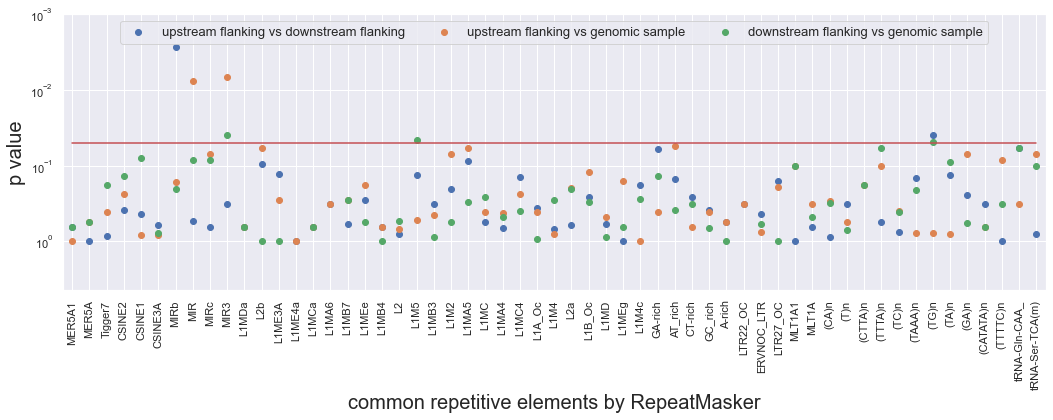

In [50]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3, 10**0.65])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)

In [51]:
#drawing brackets to annotate each repeat family
def draw_brace(ax, xspan, text):
    """Draws an annotated brace on the axes."""
    xmin, xmax = xspan
    xspan = xmax - xmin
    ax_xmin, ax_xmax = ax.get_xlim()
    xax_span = ax_xmax - ax_xmin
    ymin, ymax = ax.get_ylim()
    yspan = ymax - ymin
    resolution = int(xspan/xax_span*100)*2+1 # guaranteed uneven
    beta = 300./xax_span # the higher this is, the smaller the radius

    x = np.linspace(xmin, xmax, resolution)
    x_half = x[:resolution//2+1]
    y_half_brace = (1/(1.+np.exp(-beta*(x_half-x_half[0])))
                    + 1/(1.+np.exp(-beta*(x_half-x_half[-1]))))
    y = np.concatenate((y_half_brace, y_half_brace[-2::-1]))
    y = ymin + (.15*y - .01)*yspan # adjust vertical position

    ax.autoscale(False)
    ax.plot(x, y, color='black', lw=1)

    ax.text((xmax+xmin)/2., ymin+.2*yspan, text, ha='center', va='bottom')

In [54]:
header

['MER5A1',
 'MER5A',
 'Tigger7',
 'CSINE2',
 'CSINE1',
 'CSINE3A',
 'MIRb',
 'MIR',
 'MIRc',
 'MIR3',
 'L1MDa',
 'L2b',
 'L1ME3A',
 'L1ME4a',
 'L1MCa',
 'L1MA6',
 'L1MB7',
 'L1MEe',
 'L1MB4',
 'L2',
 'L1M5',
 'L1MB3',
 'L1M2',
 'L1MA5',
 'L1MC',
 'L1MA4',
 'L1MC4',
 'L1A_Oc',
 'L1M4',
 'L2a',
 'L1B_Oc',
 'L1MD',
 'L1MEg',
 'L1M4c',
 'GA-rich',
 'AT_rich',
 'CT-rich',
 'GC_rich',
 'A-rich',
 'LTR22_OC',
 'ERVNOC_LTR',
 'LTR27_OC',
 'MLT1A1',
 'MLT1A',
 '(CA)n',
 '(T)n',
 '(TAA)n',
 '(CTTA)n',
 '(TTTA)n',
 '(TC)n',
 '(TAAA)n',
 '(TG)n',
 '(TA)n',
 '(GA)n',
 '(CATATA)n',
 '(TTTTC)n',
 'tRNA-Gln-CAA_',
 'tRNA-Ser-TCA(m)']

In [52]:
rep_families

DNA                                        [MER5A1, MER5A, Tigger7]
SINE               [CSINE2, CSINE1, CSINE3A, MIRb, MIR, MIRc, MIR3]
LINE              [L1MDa, L2b, L1ME3A, L1ME4a, L1MCa, L1MA6, L1M...
Low_complexity         [GA-rich, AT_rich, CT-rich, GC_rich, A-rich]
LTR                 [LTR22_OC, ERVNOC_LTR, LTR27_OC, MLT1A1, MLT1A]
Simple_repeat     [(CA)n, (T)n, (TAA)n, (CTTA)n, (TTTA)n, (TC)n,...
tRNA                               [tRNA-Gln-CAA_, tRNA-Ser-TCA(m)]
dtype: object

In [67]:
rep_families['Simple_repeat']

['(CA)n',
 '(T)n',
 '(TAA)n',
 '(CTTA)n',
 '(TTTA)n',
 '(TC)n',
 '(TAAA)n',
 '(TG)n',
 '(TA)n',
 '(GA)n',
 '(CATATA)n',
 '(TTTTC)n']

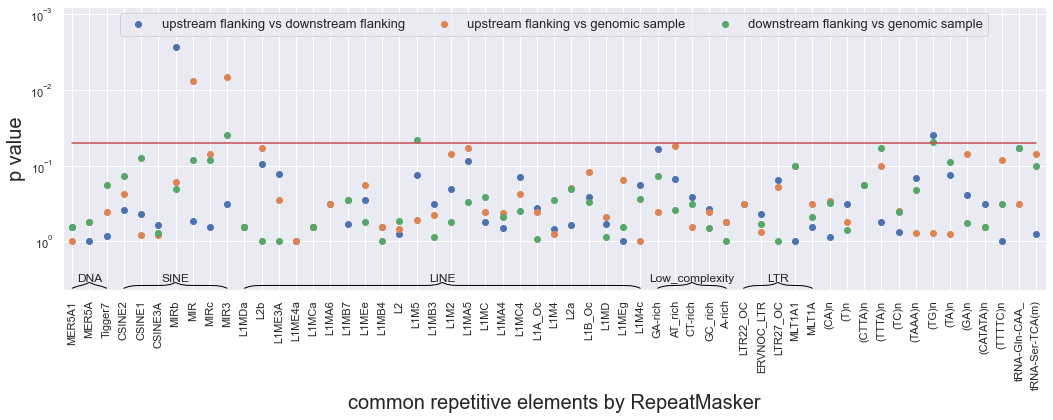

In [66]:
#visualizing
fig, axes = plt.subplots(1, 1, figsize = (15,6))
up_down = axes.scatter(x = df.columns.values, y = df.loc['up_down'])
up_sample = axes.scatter(x = df.columns.values, y = df.loc['up_sample'])
down_sample = axes.scatter(x = df.columns.values, y = df.loc['down_sample'])
axes.plot(df.columns.values, (len(df.columns.values) * [0.05]), 'r')
axes.legend((up_down, up_sample, down_sample),
          ('upstream flanking vs downstream flanking', 'upstream flanking vs genomic sample',
           'downstream flanking vs genomic sample'),
           fontsize = 13,
           ncol = 3,
           loc = 'upper center')
axes.set_ylabel('p value', fontsize = 20)
axes.set_xlabel('common repetitive elements by RepeatMasker', fontsize = 20)
plt.margins(x = 0.01)
plt.xticks(rotation = 90)
plt.yscale('log')
plt.ylim([10**-3.1, 10**0.65])
plt.gca().invert_yaxis()
plt.tight_layout()
sns.set(style = "darkgrid")
draw_brace(axes, (0,header.index('Tigger7')), rep_families.index.values[0])
draw_brace(axes,(header.index('Tigger7')+1,header.index('MIR3')),rep_families.index.values[1])
draw_brace(axes,(header.index('L1MDa'),header.index('L1M4c')),rep_families.index.values[2])
draw_brace(axes,(header.index('GA-rich'),header.index('A-rich')),rep_families.index.values[3])
draw_brace(axes,(header.index('LTR22_OC'),header.index('MLT1A')),rep_families.index.values[4])
draw_brace(axes,(header.index('CA'),header.index('MLT1A')-1),rep_families.index.values[5])
#draw_brace(axes,(header.index('MLT1A'),header.index('tRNA-Ser-TCA(m)')-1),rep_families.index.values[6])
#plt.savefig('../../results/repeatmasker_statistics.png', dpi = 100, quality = 95)